In [1]:
from torch import no_grad, tensor
from torch.nn import LSTM, Linear, Module, MSELoss
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset


def prepare_dataset_for_lstm(series, seq_length: int = 4):
    setX: list = []
    setY: list = []
    for i in range(len(series) - seq_length):
        past = series[i : i + seq_length]
        future = series[i + 1 : i + seq_length + 1]
        setX.append(past)
        setY.append(future)
    return tensor(setX), tensor(setY)


class DS_LSTM(Module):
    def __init__(self, train, input_size: int = 1, hidden_size: int = 50, num_layers: int = 1, length: int = 4):
        super().__init__()
        self.lstm = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = Linear(hidden_size, 1)
        self.optimizer = Adam(self.parameters())
        self.loss_fn = MSELoss()

        trnX, trnY = prepare_dataset_for_lstm(train, seq_length=length)
        self.loader = DataLoader(TensorDataset(trnX, trnY), shuffle=True, batch_size=len(train) // 10)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

    def fit(self):
        self.train()
        for batchX, batchY in self.loader:
            y_pred = self(batchX)
            loss = self.loss_fn(y_pred, batchY)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return loss

    def predict(self, X):
        with no_grad():
            y_pred = self(X)
        return y_pred[:, -1, :]

In [2]:
from pandas import read_csv, DataFrame, Series
from dslabs_functions import series_train_test_split

filename: str = "../set_1_diff_2.csv"
file_tag: str = "Set 1 multiple variables"
target: str = "Manhattan"
timecol: str = "Date"

measure: str = "R2"

data: DataFrame = read_csv(filename, index_col=timecol, sep=",", decimal=".", parse_dates=True)
series = data[[target]].values.astype("float32")

train_size = int(len(series) * 0.90)
train, test = series[:train_size], series[train_size:]

In [3]:
model = DS_LSTM(train, input_size=1, hidden_size=50, num_layers=1)
loss = model.fit()
print(loss)

tensor(9182.9785, grad_fn=<MseLossBackward0>)


sequence_size:   0%|          | 0/2 [00:00<?, ?it/s]

hidden units:   0%|          | 0/3 [00:00<?, ?it/s]

nr_episodes:   0%|          | 0/3001 [00:00<?, ?it/s]

seq length=2 hidden_units=25 nr_episodes=0 -0.09183657169342041
seq length=2 hidden_units=25 nr_episodes=300 0.017997384071350098
seq length=2 hidden_units=25 nr_episodes=600 -0.135359525680542
seq length=2 hidden_units=25 nr_episodes=900 -0.41432714462280273
seq length=2 hidden_units=25 nr_episodes=1200 -0.6002979278564453
seq length=2 hidden_units=25 nr_episodes=1500 -0.763595461845398
seq length=2 hidden_units=25 nr_episodes=1800 -0.9313372373580933
seq length=2 hidden_units=25 nr_episodes=2100 -1.076634407043457
seq length=2 hidden_units=25 nr_episodes=2400 -1.1794154644012451
seq length=2 hidden_units=25 nr_episodes=2700 -1.251610279083252
seq length=2 hidden_units=25 nr_episodes=3000 -1.3634529113769531


nr_episodes:   0%|          | 0/3001 [00:00<?, ?it/s]

seq length=2 hidden_units=50 nr_episodes=0 -0.09198617935180664
seq length=2 hidden_units=50 nr_episodes=300 -0.08975422382354736
seq length=2 hidden_units=50 nr_episodes=600 -0.43251335620880127
seq length=2 hidden_units=50 nr_episodes=900 -0.730582594871521
seq length=2 hidden_units=50 nr_episodes=1200 -0.8612803220748901
seq length=2 hidden_units=50 nr_episodes=1500 -1.0994033813476562
seq length=2 hidden_units=50 nr_episodes=1800 -1.2518725395202637
seq length=2 hidden_units=50 nr_episodes=2100 -1.4285221099853516
seq length=2 hidden_units=50 nr_episodes=2400 -1.6273841857910156
seq length=2 hidden_units=50 nr_episodes=2700 -1.671518325805664
seq length=2 hidden_units=50 nr_episodes=3000 -1.6914057731628418


nr_episodes:   0%|          | 0/3001 [00:00<?, ?it/s]

seq length=2 hidden_units=100 nr_episodes=0 -0.09105861186981201
seq length=2 hidden_units=100 nr_episodes=300 -0.4886763095855713
seq length=2 hidden_units=100 nr_episodes=600 -0.8489788770675659
seq length=2 hidden_units=100 nr_episodes=900 -1.1076703071594238
seq length=2 hidden_units=100 nr_episodes=1200 -1.3367376327514648
seq length=2 hidden_units=100 nr_episodes=1500 -1.5820674896240234
seq length=2 hidden_units=100 nr_episodes=1800 -1.6362168788909912
seq length=2 hidden_units=100 nr_episodes=2100 -1.5942959785461426
seq length=2 hidden_units=100 nr_episodes=2400 -1.6679084300994873
seq length=2 hidden_units=100 nr_episodes=2700 -1.639143943786621
seq length=2 hidden_units=100 nr_episodes=3000 -1.8559658527374268


hidden units:   0%|          | 0/3 [00:00<?, ?it/s]

nr_episodes:   0%|          | 0/3001 [00:00<?, ?it/s]

seq length=4 hidden_units=25 nr_episodes=0 -0.04634058475494385
seq length=4 hidden_units=25 nr_episodes=300 -0.10423076152801514
seq length=4 hidden_units=25 nr_episodes=600 -0.32037103176116943
seq length=4 hidden_units=25 nr_episodes=900 -0.37581443786621094
seq length=4 hidden_units=25 nr_episodes=1200 -0.6171880960464478
seq length=4 hidden_units=25 nr_episodes=1500 -1.0157463550567627
seq length=4 hidden_units=25 nr_episodes=1800 -1.2806153297424316
seq length=4 hidden_units=25 nr_episodes=2100 -1.4813759326934814
seq length=4 hidden_units=25 nr_episodes=2400 -1.8389313220977783
seq length=4 hidden_units=25 nr_episodes=2700 -2.027631998062134
seq length=4 hidden_units=25 nr_episodes=3000 -2.480984687805176


nr_episodes:   0%|          | 0/3001 [00:00<?, ?it/s]

seq length=4 hidden_units=50 nr_episodes=0 -0.045836687088012695
seq length=4 hidden_units=50 nr_episodes=300 -0.25824642181396484
seq length=4 hidden_units=50 nr_episodes=600 -0.7443537712097168
seq length=4 hidden_units=50 nr_episodes=900 -1.0961639881134033
seq length=4 hidden_units=50 nr_episodes=1200 -1.2167131900787354
seq length=4 hidden_units=50 nr_episodes=1500 -1.7969350814819336
seq length=4 hidden_units=50 nr_episodes=1800 -1.5058810710906982
seq length=4 hidden_units=50 nr_episodes=2100 -1.502838134765625
seq length=4 hidden_units=50 nr_episodes=2400 -1.6076974868774414
seq length=4 hidden_units=50 nr_episodes=2700 -1.847579002380371
seq length=4 hidden_units=50 nr_episodes=3000 -2.2634546756744385


nr_episodes:   0%|          | 0/3001 [00:00<?, ?it/s]

seq length=4 hidden_units=100 nr_episodes=0 -0.04509401321411133
seq length=4 hidden_units=100 nr_episodes=300 -1.1833021640777588
seq length=4 hidden_units=100 nr_episodes=600 -2.68861985206604
seq length=4 hidden_units=100 nr_episodes=900 -3.066208839416504
seq length=4 hidden_units=100 nr_episodes=1200 -4.343148231506348
seq length=4 hidden_units=100 nr_episodes=1500 -4.912606239318848
seq length=4 hidden_units=100 nr_episodes=1800 -5.551513671875
seq length=4 hidden_units=100 nr_episodes=2100 -6.009303569793701
seq length=4 hidden_units=100 nr_episodes=2400 -6.38436222076416
seq length=4 hidden_units=100 nr_episodes=2700 -6.456869602203369
seq length=4 hidden_units=100 nr_episodes=3000 -6.507952690124512
LSTM best results achieved with length=2 hidden_units=25 and nr_episodes=300) ==> measure=0.02


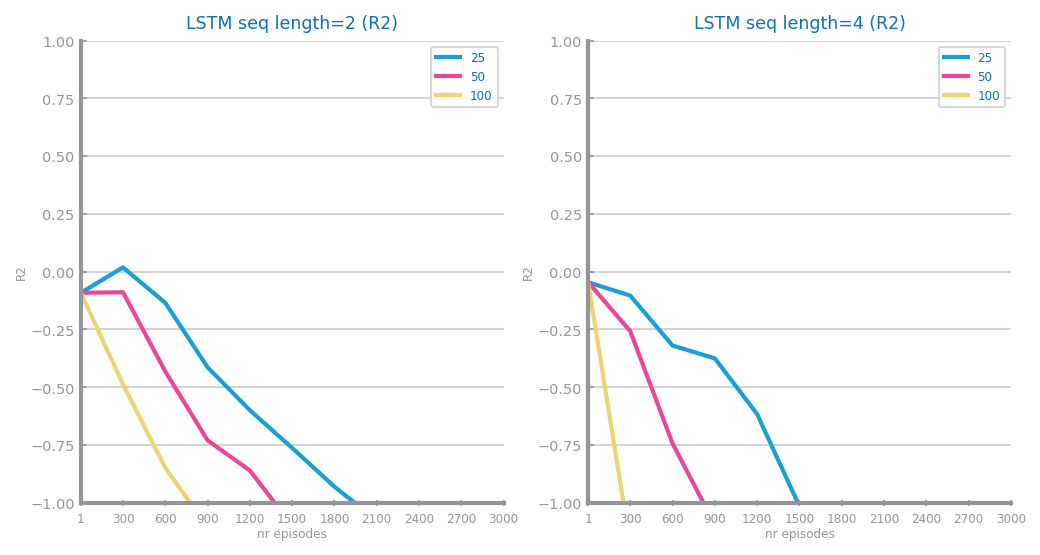

In [5]:
from tqdm.notebook import tqdm
from dslabs_functions import HEIGHT, plot_multiline_chart
from copy import deepcopy

from matplotlib.pyplot import figure, savefig, subplots
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart


def lstm_study(train, test, nr_episodes: int = 1000, measure: str = "R2"):
    sequence_size = [2, 4]
    nr_hidden_units = [25, 50, 100]

    step: int = nr_episodes // 10
    episodes = [1] + list(range(0, nr_episodes + 1, step))[1:]
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "LSTM", "metric": measure, "params": ()}
    best_performance: float = -100000

    _, axs = subplots(1, len(sequence_size), figsize=(len(sequence_size) * HEIGHT, HEIGHT))

    for i in tqdm(range(len(sequence_size)), 'sequence_size', position=1):
        length = sequence_size[i]
        tstX, tstY = prepare_dataset_for_lstm(test, seq_length=length)

        values = {}
        for hidden in tqdm(nr_hidden_units, 'hidden units', position=2):
            yvalues = []
            model = DS_LSTM(train, hidden_size=hidden)
            for n in tqdm(range(0, nr_episodes + 1), 'nr_episodes', position=3):
                model.fit()
                if n % step == 0:
                    prd_tst = model.predict(tstX)
                    eval: float = FORECAST_MEASURES[measure](test[length:], prd_tst)
                    print(f"seq length={length} hidden_units={hidden} nr_episodes={n}", eval)
                    if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
                        best_performance: float = eval
                        best_params["params"] = (length, hidden, n)
                        best_model = deepcopy(model)
                    yvalues.append(eval)
            values[hidden] = yvalues
        plot_multiline_chart(
            episodes,
            values,
            ax=axs[i],
            title=f"LSTM seq length={length} ({measure})",
            xlabel="nr episodes",
            ylabel=measure,
            percentage=flag,
        )
    print(
        f"LSTM best results achieved with length={best_params["params"][0]} hidden_units={best_params["params"][1]} and nr_episodes={best_params["params"][2]}) ==> measure={best_performance:.2f}"
    )
    return best_model, best_params



best_model, best_params = lstm_study(train, test, nr_episodes=3000, measure=measure)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ruben\\Documents\\Portugal\\DataScience\\Data_science_project\\images_LSTM\\Set 1 multiple variables_lstms_R2_eval.png'

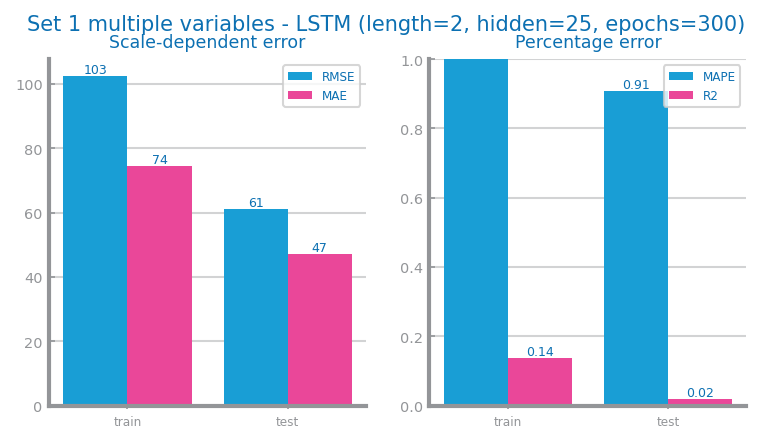

In [ ]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
best_length = params[0]
trnX, trnY = prepare_dataset_for_lstm(train, seq_length=best_length)
tstX, tstY = prepare_dataset_for_lstm(test, seq_length=best_length)

prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)

plot_forecasting_eval(
    train[best_length:],
    test[best_length:],
    prd_trn,
    prd_tst,
    title=f"{file_tag} - LSTM (length={best_length}, hidden={params[1]}, epochs={params[2]})",
)
savefig(f"../MODELS’ EVALUATION/images_LSTM/{file_tag}_lstms_{measure}_eval.png")

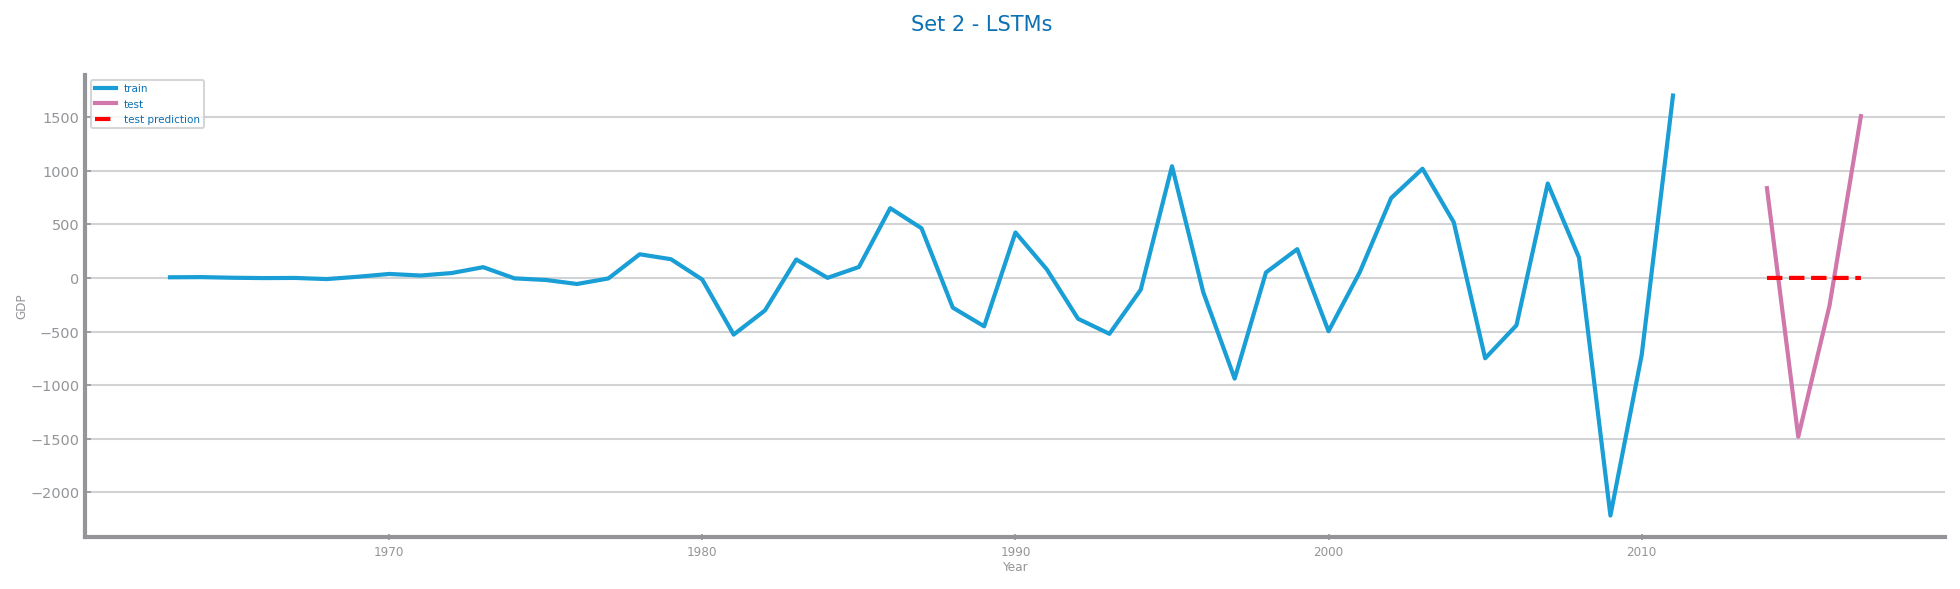

In [ ]:

from dslabs_functions import plot_forecasting_series

series = data[[target]]
train, test = series[:train_size], series[train_size:]
pred_series: Series = Series(prd_tst.numpy().ravel(), index=test.index[best_length:])

plot_forecasting_series(
    train[best_length:],
    test[best_length:],
    pred_series,
    title=f"{file_tag} - LSTMs ",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"/home/mina/Documents/portugal/dataScience/Data_science_project/MODELS’ EVALUATION/images_LSTM/{file_tag}_lstms_{measure}_forecast.png")